In [2]:
#pip install geopandas shapely matplotlib

                      geometry
0     POINT (51.90224 2.93802)
1  POINT (-49.17542 -74.58734)
2   POINT (74.00753 -61.05989)
3    POINT (92.45882 58.98520)
4  POINT (-57.47707 -72.74895)


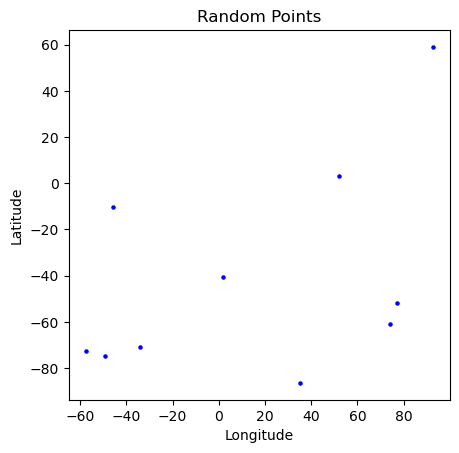

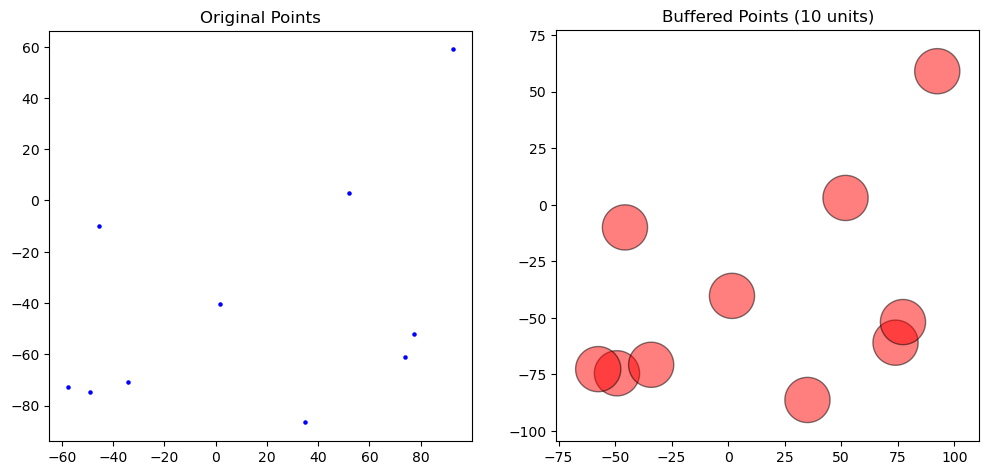

In [3]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def generate_random_points(num_points, x_range, y_range):
    points = []
    for _ in range(num_points):
        x = np.random.uniform(x_range[0], x_range[1])
        y = np.random.uniform(y_range[0], y_range[1])
        points.append(Point(x, y))
    return points

# Generate 10 random points within the range (-100, 100) for both x and y
num_points = 10
x_range = (-100, 100)
y_range = (-100, 100)
points = generate_random_points(num_points, x_range, y_range)

# Create a GeoDataFrame from the points
gdf = gpd.GeoDataFrame(geometry=points)

# Print the first few rows of the GeoDataFrame
print(gdf.head())

# Plot the data
gdf.plot(marker='o', color='blue', markersize=5)
plt.title('Random Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Perform spatial analysis: Buffer analysis

buffered_gdf = gdf.copy()
buffered_gdf['geometry'] = buffered_gdf['geometry'].buffer(10)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
gdf.plot(ax=ax[0], marker='o', color='blue', markersize=5)
ax[0].set_title('Original Points')
buffered_gdf.plot(ax=ax[1], color='red', edgecolor='black', alpha=0.5)
ax[1].set_title('Buffered Points (10 units)')
plt.show()

# Save the buffered geometries to a new shapefile
buffered_gdf.to_file('buffered_random_points.shp')